<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Preproc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preproceesamiento de los datos
### Datos reales

## Preproceso 1 (Codigos Alfanumericos)

In [50]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Importamos Datos

In [ ]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/serie_acc_SRT.csv

--2023-05-08 12:45:28--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/serie_acc_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26984867 (26M) [text/plain]
Saving to: ‘serie_acc_SRT.csv.1’

serie_acc_SRT.csv.1 100%[===================>]  25.73M  --.-KB/s    in 0.1s    

2023-05-08 12:45:30 (208 MB/s) - ‘serie_acc_SRT.csv.1’ saved [26984867/26984867]



In [ ]:
df = pd.read_csv('/content/serie_acc_SRT.csv', header=0, sep=';',
                 names=['año','mes','codigo','total_cp'],
                 dtype={'año': str, 'mes': str, 'codigo': str, 'total_cp': str})

In [ ]:
column_order = ['codigo', 'año', 'mes', 'total_cp']
new_df = df.reindex(columns=column_order)
df = new_df.copy()

In [ ]:
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470278 entries, 0 to 1470277
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1469958 non-null  object
 1   año       1470278 non-null  object
 2   mes       1470278 non-null  object
 3   total_cp  1470278 non-null  object
dtypes: object(4)
memory usage: 44.9+ MB


#### Ajustamos tipo de datos

In [ ]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [ ]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [ ]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [ ]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

#### Ordenamos por codigo

In [ ]:
df = df.sort_values(['codigo'], ascending=True)
df

,codigo,año,mes,total_cp
1076603,,2019,4,1
926647,,2017,11,1
1065465,,2019,3,2
794213,,2016,8,47
845636,,2017,2,1
...,...,...,...,...
1423676,NaN,2022,10,4
1430197,NaN,2022,11,1
1444874,NaN,2023,1,1
1452536,NaN,2023,2,2


#### Eliminamos NaN

In [ ]:
df = df.dropna(subset=['codigo'])
df

,codigo,año,mes,total_cp
1076603,,2019,4,1
926647,,2017,11,1
1065465,,2019,3,2
794213,,2016,8,47
845636,,2017,2,1
...,...,...,...,...
1389622,Z9408ACJ,2022,6,1
389845,Z9408ACK,2012,10,1
217384,Z9408ALA,2011,3,1
164789,Z9420XAA,2010,9,1


#### Eliminamos codigos vacios

In [ ]:
df = df.loc[df.codigo != "        "]
df

,codigo,año,mes,total_cp
12144,0 0000,2005,9,1
54963,0 0000,2008,10,1
712045,0 0000,2015,10,1
73138,0 0000,2009,5,5
15452,0 0000,2006,3,2
...,...,...,...,...
1389622,Z9408ACJ,2022,6,1
389845,Z9408ACK,2012,10,1
217384,Z9408ALA,2011,3,1
164789,Z9420XAA,2010,9,1


#### Filtramos los codigos de nuevo formato 

In [ ]:
df = df[df['codigo'].str.startswith(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))]
df

,codigo,año,mes,total_cp
536206,A1262AAA,2014,2,1
626450,A1419AAA,2014,12,4
611394,A1425AAA,2014,10,3
617513,A1669AAA,2014,11,1
511692,A1712AAA,2013,11,1
...,...,...,...,...
1389622,Z9408ACJ,2022,6,1
389845,Z9408ACK,2012,10,1
217384,Z9408ALA,2011,3,1
164789,Z9420XAA,2010,9,1


#### Guardamos base con codigo alfanumerico

In [ ]:
df.to_csv('alfanumerico_SRT.csv')

## Preproceso 2

In [ ]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv

--2023-05-08 15:50:17--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/alfanumerico_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29796040 (28M) [text/plain]
Saving to: ‘alfanumerico_SRT.csv’

alfanumerico_SRT.cs 100%[===================>]  28.42M  --.-KB/s    in 0.09s   

2023-05-08 15:50:18 (306 MB/s) - ‘alfanumerico_SRT.csv’ saved [29796040/29796040]



In [69]:
df = pd.read_csv('/content/alfanumerico_SRT.csv', header=0, usecols=[1,2,3,4])
df

,codigo,año,mes,total_cp
0,X5001COC,1996,5,1
1,B1602EIB,1996,7,1
2,B1625XAF,1996,7,1
3,B1651FNF,1996,7,1
4,B1688GEV,1996,7,1
...,...,...,...,...
1166442,X5901AEA,2023,5,1
1166443,X5960FLM,2023,5,1
1166444,X5971ALF,2023,5,1
1166445,Y4500XAL,2023,5,1


#### Ordenamos por año y fecha

In [70]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,X5001COC,1996,5,1
1,B1602EIB,1996,7,1
2,B1625XAF,1996,7,1
3,B1651FNF,1996,7,1
4,B1688GEV,1996,7,1
...,...,...,...,...
1166442,X5901AEA,2023,5,1
1166443,X5960FLM,2023,5,1
1166444,X5971ALF,2023,5,1
1166445,Y4500XAL,2023,5,1


#### Convertimos codigo a 4 caracteres significativos

In [71]:
df['codigo'] = df['codigo'].str.slice(start=1, stop=5)
df

,codigo,año,mes,total_cp
0,5001,1996,5,1
1,1602,1996,7,1
2,1625,1996,7,1
3,1651,1996,7,1
4,1688,1996,7,1
...,...,...,...,...
1166442,5901,2023,5,1
1166443,5960,2023,5,1
1166444,5971,2023,5,1
1166445,4500,2023,5,1


In [72]:
# Ordenamos por codigo
df.sort_values('codigo', ascending=True)

,codigo,año,mes,total_cp
723986,0000,2017,10,1
1049254,0000,2021,9,1
753281,0000,2018,2,4
768849,0000,2018,4,2
298549,0000,2012,10,1
...,...,...,...,...
234296,9420,2012,1,1
234295,9420,2012,1,2
234294,9420,2012,1,1
74739,9420,2010,3,1


#### Verificamos cantidad de registros por codigo


In [73]:
# codigos unicos
contador = df['codigo'].value_counts()
contador

5000    21624
2000    17800
4000    13201
5500    12216
1425    11749
        ...  
4453        1
4160        1
6593        1
6561        1
3033        1
Name: codigo, Length: 2852, dtype: int64

#### Eliminamos codigos no validos

In [74]:
df = df.loc[df.codigo != "0000"]
df = df.loc[df.codigo != "0001"]
df = df.loc[df.codigo != "0005"]
df

,codigo,año,mes,total_cp
0,5001,1996,5,1
1,1602,1996,7,1
2,1625,1996,7,1
3,1651,1996,7,1
4,1688,1996,7,1
...,...,...,...,...
1166442,5901,2023,5,1
1166443,5960,2023,5,1
1166444,5971,2023,5,1
1166445,4500,2023,5,1


### Sumarizamos total_cp por codigo

In [75]:
df = df.sort_values(['codigo','año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
58710,0144,2010,1,1
122011,0502,2010,10,1
545146,1000,2015,8,1
545147,1000,2015,8,1
545148,1000,2015,8,1
...,...,...,...,...
1165362,9420,2023,4,1
1165363,9420,2023,4,1
1165364,9420,2023,4,1
1165365,9420,2023,4,1


In [76]:
row_cod = next(df.iterrows())[1].codigo
row_aaa = next(df.iterrows())[1]['año']
row_mmm = next(df.iterrows())[1].mes
suma = 0
registro = []

for index, row in df.iterrows():
  if row.codigo == row_cod:
    if row['año'] == row_aaa:
      if row.mes == row_mmm:
        suma += row.total_cp
      else:
        registro.append([row_cod, row_aaa, row_mmm, suma])        
        suma = row.total_cp
        row_cod = row.codigo
        row_aaa = row['año']
        row_mmm = row.mes
    else:
      registro.append([row_cod, row_aaa, row_mmm, suma])        
      suma = row.total_cp
      row_cod = row.codigo
      row_aaa = row['año']
      row_mmm = row.mes  
  else:
    registro.append([row_cod, row_aaa, row_mmm, suma])        
    suma = row.total_cp
    row_cod = row.codigo
    row_aaa = row['año']
    row_mmm = row.mes


In [92]:
df = pd.DataFrame(registro, columns=['codigo','año','mes','total_cp'])
df

,codigo,año,mes,total_cp
0,0144,2010,1,1
1,0502,2010,10,1
2,1000,2015,8,3
3,1000,2015,9,6
4,1000,2018,2,1
...,...,...,...,...
218606,9420,2022,11,25
218607,9420,2022,12,26
218608,9420,2023,1,14
218609,9420,2023,2,22


#### Utilizamos la fecha como indice 

In [93]:
df['fecha'] = pd.to_datetime({'year': df['año'],
                               'month': df['mes'],
                               'day': '01'})
df = df.set_index('fecha')
df

,codigo,año,mes,total_cp
fecha,,,,
2010-01-01,0144,2010,1,1
2010-10-01,0502,2010,10,1
2015-08-01,1000,2015,8,3
2015-09-01,1000,2015,9,6
2018-02-01,1000,2018,2,1
...,...,...,...,...
2022-11-01,9420,2022,11,25
2022-12-01,9420,2022,12,26
2023-01-01,9420,2023,1,14


#### Visualizamos datos por codigo

In [94]:
codigos = df.value_counts('codigo')
codigos

codigo
1900    258
1425    251
2000    250
5000    247
8300    242
       ... 
5286      1
2721      1
6593      1
6561      1
0144      1
Length: 2851, dtype: int64

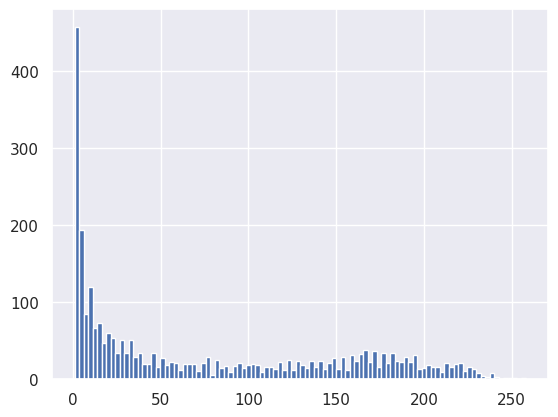

In [95]:
codigos.hist(bins=100);

#### Conservamos al menos 48 meses por codigo

In [96]:
mayores_a_48 = codigos[codigos > 48]

In [97]:
df = df[df['codigo'].isin(mayores_a_48.index)]

In [98]:
df

,codigo,año,mes,total_cp
fecha,,,,
2000-09-01,1001,2000,9,1
2000-11-01,1001,2000,11,1
2001-01-01,1001,2001,1,1
2001-02-01,1001,2001,2,1
2001-08-01,1001,2001,8,1
...,...,...,...,...
2022-11-01,9420,2022,11,25
2022-12-01,9420,2022,12,26
2023-01-01,9420,2023,1,14


In [99]:
unicos = pd.unique(df.codigo)
print("Codigos con 48 datos o mas: ", len(unicos))

Codigos con 48 datos o mas:  1392


In [100]:
df

,codigo,año,mes,total_cp
fecha,,,,
2000-09-01,1001,2000,9,1
2000-11-01,1001,2000,11,1
2001-01-01,1001,2001,1,1
2001-02-01,1001,2001,2,1
2001-08-01,1001,2001,8,1
...,...,...,...,...
2022-11-01,9420,2022,11,25
2022-12-01,9420,2022,12,26
2023-01-01,9420,2023,1,14


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199330 entries, 2000-09-01 to 2023-03-01
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    199330 non-null  object
 1   año       199330 non-null  int64 
 2   mes       199330 non-null  int64 
 3   total_cp  199330 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.6+ MB


#### Guardar datos

In [ ]:
df.to_csv('alfanumerico_48_SRT.csv')